### Importing Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Iris Dataset

In [4]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Selecting The Features For Clustering

In [6]:
# Dropping the 'Species' column
iris_cluster = iris.drop(columns=["Id", "Species"])
iris_cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
# Selecting 2 random features from the dataset for clustering
# Here we choose Sepal Length column 0 and Sepal Width column 1
X = iris_cluster[["SepalLengthCm", "SepalWidthCm"]]
X

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Using Elbow Graph To Find Optimum Number Of Clusters

In [34]:
from sklearn.cluster import KMeans

WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

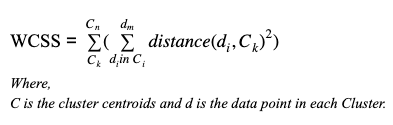

In [35]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # (kmeans.inertia_ returns the WCSS value for an initialized cluster)

In [36]:
wcss

[130.18093333333334,
 57.98240604207882,
 37.1237021276596,
 27.962171178088646,
 20.95755832230973,
 17.23869523809524,
 14.631909607059612,
 12.845194139194142,
 11.199478233119535,
 9.636366584481912]

### Plotting The Elbow graph

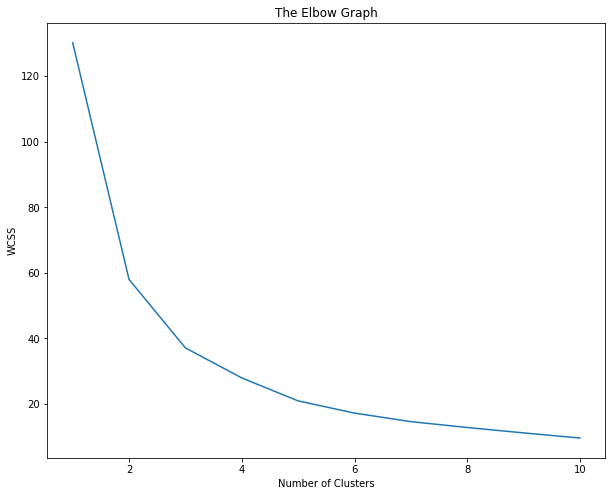

In [37]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss)
plt.title("The Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

We can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.

### Initialising K-Means With Optimum Number Of Clusters

In [42]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=32)
y = kmeans.fit_predict(X)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualising The Clusters

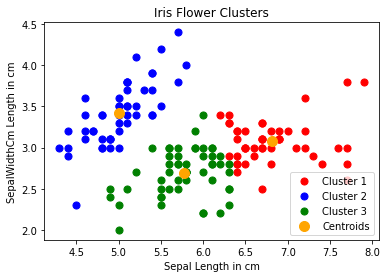

In [41]:
plt.scatter(X.iloc[y == 0, 0], X.iloc[y == 0, 1], s = 50, c = "red", label = "Cluster 1")
plt.scatter(X.iloc[y == 1, 0], X.iloc[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y == 2, 0], X.iloc[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('SepalWidthCm Length in cm')
plt.legend()
plt.show()